In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
df = pd.read_csv("C:/Users/adars/Downloads/Data Analysis-20250819T124218Z-1-001/Data Analysis/Telco_Customer_Churn_Dataset .csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
print("Missing values:", df.isnull().sum().sum())

Missing values: 0


In [10]:
print("Duplicates:", df["customerID"].duplicated().sum())

Duplicates: 0


In [11]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [12]:
df.head(40)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
print("Data after cleaning:")
print(df.info())

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

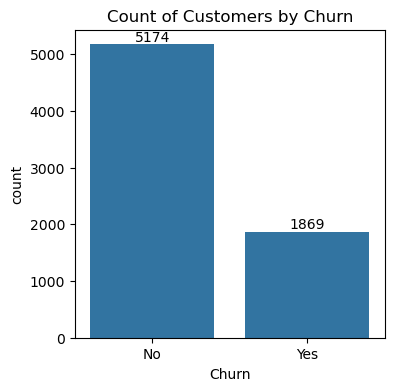

In [14]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

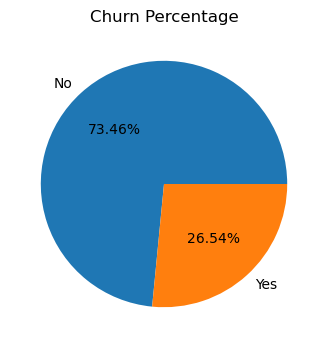

In [15]:
plt.figure(figsize=(4,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Churn Percentage")
plt.show()

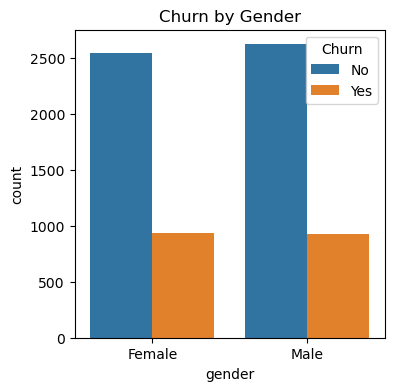

In [16]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()


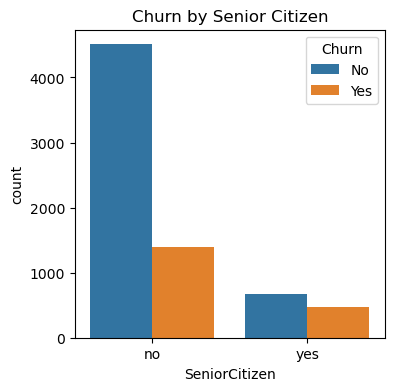

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
plt.title("Churn by Senior Citizen")
plt.show()

In [18]:
segmentation = df.groupby(['Contract'])[['tenure','MonthlyCharges']].mean().reset_index()
print("Average Tenure and Monthly Charges by Contract Type:")
print(segmentation)

Average Tenure and Monthly Charges by Contract Type:
         Contract     tenure  MonthlyCharges
0  Month-to-month  18.036645       66.398490
1        One year  42.044807       65.048608
2        Two year  56.735103       60.770413


In [19]:
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Rate by Contract Type (%):")
print(churn_by_contract)


Churn Rate by Contract Type (%):
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


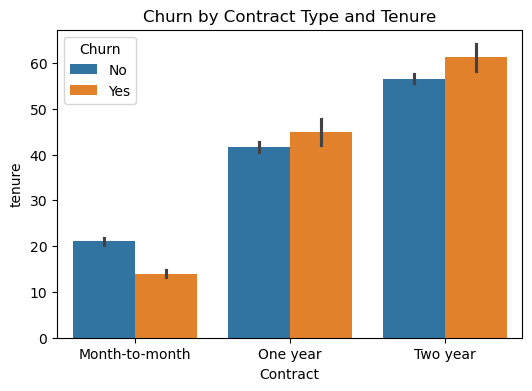

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(x='Contract', y='tenure', data=df, hue='Churn')
plt.title("Churn by Contract Type and Tenure")
plt.show()

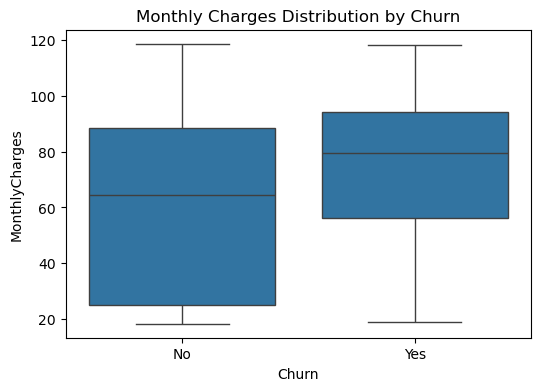

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

In [22]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != "customerID":
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

In [23]:
X = df_encoded.drop(["Churn","customerID"], axis=1)
y = df_encoded["Churn"]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))


Accuracy: 0.8161816891412349

Confusion Matrix:
 [[934 102]
 [157 216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [27]:
corr = df_encoded.drop(columns=["customerID"]).corr()["Churn"].sort_values(ascending=False)

print("Top Factors Influencing Churn:\n", corr.head(10))

Top Factors Influencing Churn:
 Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
Name: Churn, dtype: float64


In [28]:
df["LTV"] = df["MonthlyCharges"] * df["tenure"]

In [29]:
high_value_churn = df[(df["LTV"] > df["LTV"].quantile(0.75)) & (df["Churn"]=="Yes")]
print("\nHigh-Value Customers at Risk of Churn:")
print(high_value_churn[["customerID","LTV","Contract","MonthlyCharges","tenure"]].head(10))



High-Value Customers at Risk of Churn:
     customerID      LTV        Contract  MonthlyCharges  tenure
13   0280-XJGEX  5081.30  Month-to-month          103.70      49
26   6467-CHFZW  4669.45  Month-to-month           99.35      47
104  3192-NQECA  7480.00        Two year          110.00      68
110  0486-HECZI  5321.25  Month-to-month           96.75      55
173  0691-JVSYA  5027.05        One year           94.85      53
276  4484-GLZOU  5462.60  Month-to-month          105.05      52
320  5020-ZSTTY  4452.30        One year           82.45      54
335  4322-RCYMT  5154.40        One year           75.80      68
336  6680-NENYN  4497.80        Two year          104.60      43
339  1343-EHPYB  6514.20  Month-to-month          103.40      63


In [30]:
print("\nStrategies to Reduce Churn:")
print("- Provide loyalty discounts to long-tenure customers.")
print("- Offer flexible contract terms to month-to-month customers.")
print("- Improve customer support for high-value at-risk customers.")



Strategies to Reduce Churn:
- Provide loyalty discounts to long-tenure customers.
- Offer flexible contract terms to month-to-month customers.
- Improve customer support for high-value at-risk customers.


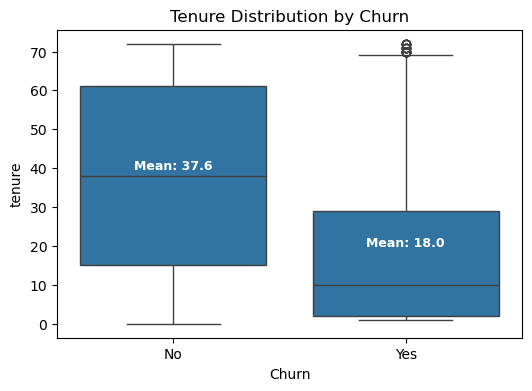

In [31]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="Churn", y="tenure", data=df)

# Add mean values as labels
grouped = df.groupby("Churn")["tenure"].mean()
for i, val in enumerate(grouped):
    ax.text(i, val+2, f"Mean: {val:.1f}", ha="center", color="white", fontsize=9, weight="bold")

plt.title("Tenure Distribution by Churn")
plt.show()

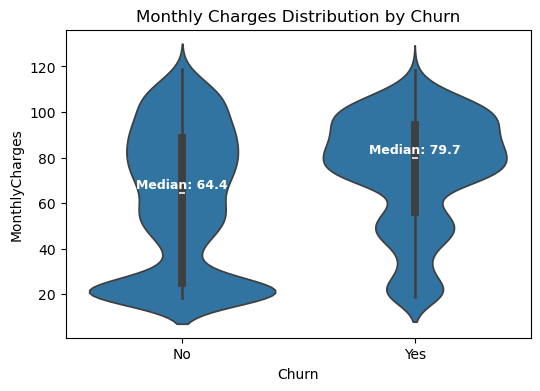

In [32]:
plt.figure(figsize=(6,4))
ax = sns.violinplot(x="Churn", y="MonthlyCharges", data=df)

# Add median values as labels
grouped = df.groupby("Churn")["MonthlyCharges"].median()
for i, val in enumerate(grouped):
    ax.text(i, val+2, f"Median: {val:.1f}", ha="center", color="white", fontsize=9, weight="bold")

plt.title("Monthly Charges Distribution by Churn")
plt.show()

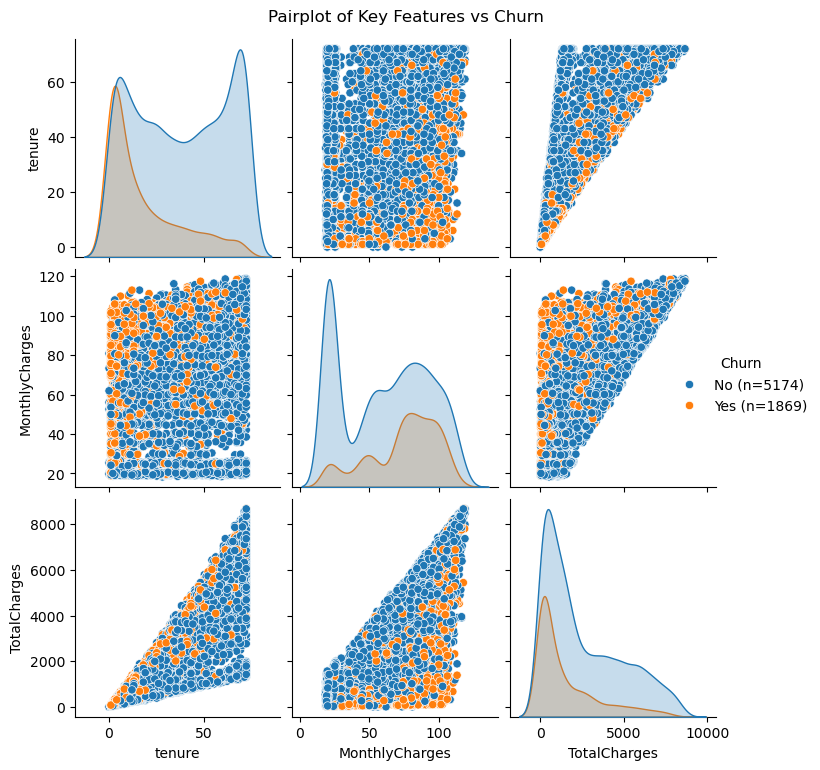

In [33]:
g = sns.pairplot(df[["tenure","MonthlyCharges","TotalCharges","Churn"]], hue="Churn")

# Add counts to legend
for t, l in zip(g._legend.texts, df["Churn"].value_counts().values):
    t.set_text(f"{t.get_text()} (n={l})")

g.fig.suptitle("Pairplot of Key Features vs Churn", y=1.02)
plt.show()

In [1]:
print(" Project Completed: All 6 Tasks Implemented")

 Project Completed: All 6 Tasks Implemented
